In [3]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 15.2 MB/s eta 0:00:00


In [4]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [5]:
IMAGE_PATH = '/content/id_13_value_21_789_jpg.rf.2a55ab98439325527430462375693f4e.jpg'

In [6]:
# Đường dẫn đến file .txt chứa các nhãn
txt_file = '/content/id_13_value_21_789_jpg.rf.2a55ab98439325527430462375693f4e.txt'

# Đọc các nhãn từ file .txt và xây dựng chuỗi kí tự hoàn chỉnh
labels = []
with open(txt_file, 'r') as f:
    for line in f:
        label, x_min, y_min, width, height = line.strip().split(' ')
        labels.append((str(label),float(x_min), float(y_min), float(width), float(height)))
sorted_labels = sorted(labels, key=lambda x: x[1])
# Kết hợp các nhãn thành chuỗi kí tự hoàn chỉnh theo thứ tự từ trái sang phải
#complete_string = ''.join(labels)
sorted_classes = [label[0] for label in sorted_labels]
print(sorted_classes)
text = ''.join(sorted_classes)


['0', '0', '0', '2', '1', '7', '8', '9']


In [7]:
reader = easyocr.Reader(['en'] , gpu = False)
result = reader.readtext(IMAGE_PATH)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[264, 132], [288, 132], [288, 166], [264, 166]], '9', 0.6442151562150711),
 ([[329, 125], [379, 125], [379, 161], [329, 161]], '90', 0.9999740376400299),
 ([[431, 125], [577, 125], [577, 169], [431, 169]],
  '0.870.88',
  0.7729833378158261),
 ([[129, 147], [193, 147], [193, 187], [129, 187]], '92)', 0.9941827992082676),
 ([[567, 229], [640, 229], [640, 265], [567, 265]], '0.83', 0.652220088983938)]

In [8]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
font = cv2.FONT_HERSHEY_SIMPLEX

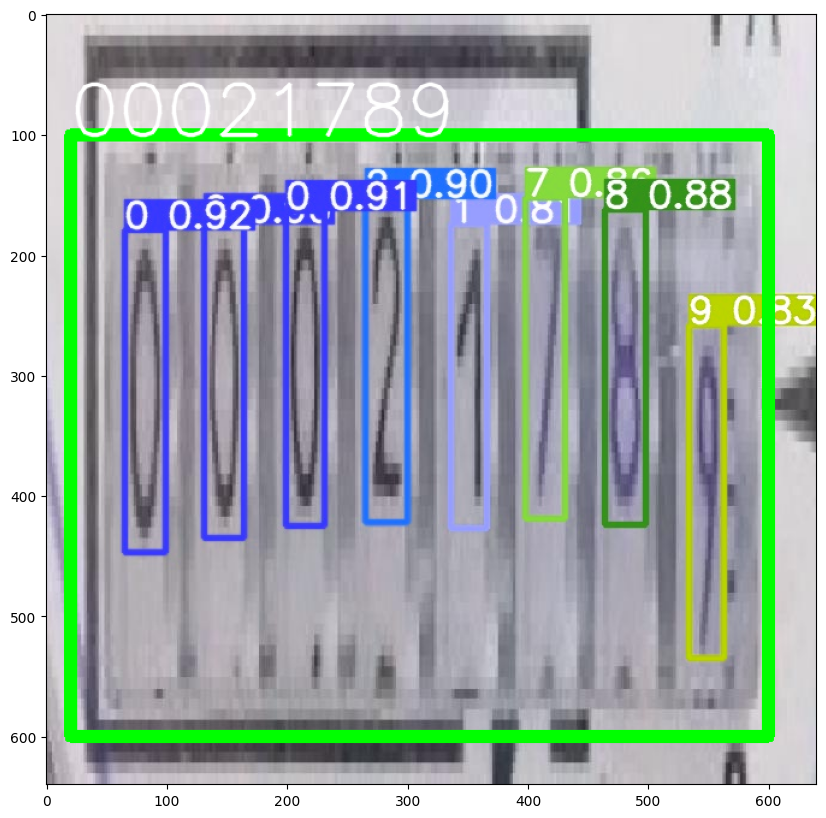

In [11]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,(20,100),(600,600),(0,255,0),10)
img = cv2.putText(img,text,(20,100), font, 2,(255,255,255),2,cv2.LINE_AA)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext('/content/id_175_value_374_241.jpg')
result

[([[11, 7], [459, 7], [459, 97], [11, 97]],
  '1 p 3 7 4241',
  0.44715797945020813)]